## Fixed point, images, and units

In [1]:
using FixedPointNumbers

┌ Info: Precompiling FixedPointNumbers [53c48c17-4a7d-5ca2-90c5-79b7896eea93]
└ @ Base loading.jl:1253


FixedPointNumbers provides two kinds of fixed point.

- `Fixed{T,f}` - signed integer type T with `f` fraction bits (scaled by $2^f$)
- `Normed{T,f}` - unsigned, and scaled by $2^{f}-1$

In [2]:
typemin(Fixed{Int8,4}), typemax(Fixed{Int8,4})

(-8.0Q3f4, 7.94Q3f4)

In [3]:
typemin(Normed{UInt8,4}), typemax(Normed{UInt8,4})

(0.0N4f4, 17.0N4f4)

In [4]:
typemin(Normed{UInt8,2}), typemax(Normed{UInt8,2})

(0.0N6f2, 85.0N6f2)

In [5]:
N4f4

Normed{UInt8,4}

In [6]:
N0f8

Normed{UInt8,8}

In [7]:
reinterpret(N0f8, 0xff)

1.0N0f8

## Moving between representations

In [8]:
using Images, AxisArrays, ImageAxes, TestImages, Unitful, Colors

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1253
┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1253
┌ Info: Precompiling Unitful [1986cc42-f94f-5a68-af5c-568840ba703d]
└ @ Base loading.jl:1253


In [9]:
a = [0.2N0f8, 0.8N0f8]

2-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.2N0f8
 0.8N0f8

In [10]:
raw = rawview(a)

2-element reinterpret(UInt8, ::Array{N0f8,1}):
 0x33
 0xcc

In [11]:
raw[2] = 0xff

0xff

In [12]:
a

2-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.2N0f8
 1.0N0f8

Images.jl can create several other kinds of "views" to access different representations:
- `colorview` for separate channel images
- `paddedview` to pad to a larger size without copying
- `StackedView` to virtually stack images

In [13]:
colorview(RGB, 0:.01:1, zeroarray, 1:-.01:0)

In [14]:
typeof(ans)

MappedArrays.MultiMappedArray{RGB{Float64},1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},ImageCore.ZeroArray{Float64,1,Base.OneTo{Int64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}},Type{RGB{Float64}},typeof(ImageCore.extractchannels)}

## Named axes and units

In [16]:
img = testimage("mri")

3-dimensional AxisArray{Gray{N0f8},3,...} with axes:
    :P, 0:1:225
    :R, 0:1:185
    :S, 0:5:130
And data, a 226×186×27 Array{Gray{N0f8},3} with eltype Gray{Normed{UInt8,8}}:
[:, :, 1] =
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)  …  Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)  …  Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)     Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}(0.0)  …  Gray{N0f8}(0.0)  Gray{N0f8}(0.0)
 Gray{N0f8}(0.0)  Gray{N0f8}

In [17]:
img.axes

(Axis{:P,StepRange{Int64,Int64}}(0:1:225), Axis{:R,StepRange{Int64,Int64}}(0:1:185), Axis{:S,StepRange{Int64,Int64}}(0:5:130))

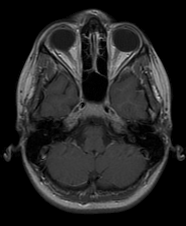

In [18]:
img[Axis{:S}(5)]

In [19]:
using Unitful: mm, s

In [20]:
img = AxisArray(rand(256, 256, 6, 50), (:x, :y, :z, :time), (0.4mm, 0.4mm, 1mm, 2s))

4-dimensional AxisArray{Float64,4,...} with axes:
    :x, (0.0:0.4:102.0) mm
    :y, (0.0:0.4:102.0) mm
    :z, (0:5) mm
    :time, (0:2:98) s
And data, a 256×256×6×50 Array{Float64,4}:
[:, :, 1, 1] =
 0.94155    0.255867   0.15973    …  0.676862   0.506752   0.226714
 0.450921   0.583914   0.392098      0.0890647  0.665243   0.653889
 0.371637   0.0198805  0.926913      0.762852   0.785753   0.457325
 0.208968   0.345807   0.164148      0.741709   0.559914   0.779689
 0.776596   0.798036   0.617811      0.52508    0.626409   0.704289
 0.865977   0.660571   0.0291959  …  0.162224   0.702032   0.0633394
 0.0633743  0.928464   0.359262      0.650638   0.447906   0.812219
 0.534375   0.369609   0.232155      0.481273   0.382576   0.759915
 0.860043   0.109159   0.955045      0.285047   0.612891   0.915844
 0.996484   0.73241    0.834803      0.196447   0.620572   0.56833
 0.810788   0.421862   0.731291   …  0.902879   0.684817   0.193757
 0.198531   0.757621   0.594187      0.502503   0.0

In [21]:
img.axes

(Axis{:x,StepRangeLen{Quantity{Float64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}},Base.TwicePrecision{Quantity{Float64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}}},Base.TwicePrecision{Quantity{Float64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}}}}}((0.0:0.4:102.0) mm), Axis{:y,StepRangeLen{Quantity{Float64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}},Base.TwicePrecision{Quantity{Float64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}}},Base.TwicePrecision{Quantity{Float64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}}}}}((0.0:0.4:102.0) mm), Axis{:z,StepRange{Quantity{Int64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}},Quantity{Int64,𝐋,Unitful.FreeUnits{(mm,),𝐋,nothing}}}}((0:5) mm), Axis{:time,StepRange{Quantity{Int64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Quantity{Int64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}}}}((0:2:98) s))

In [22]:
t = timeaxis(img)

Axis{:time,StepRange{Quantity{Int64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},Quantity{Int64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}}}}((0:2:98) s)

In [23]:
img[t(10)]

3-dimensional AxisArray{Float64,3,...} with axes:
    :x, (0.0:0.4:102.0) mm
    :y, (0.0:0.4:102.0) mm
    :z, (0:5) mm
And data, a 256×256×6 Array{Float64,3}:
[:, :, 1] =
 0.681448    0.441545    0.562811   …  0.197826    0.0362103  0.276826
 0.356352    0.258107    0.0944511     0.993005    0.0201272  0.347631
 0.501063    0.99955     0.324989      0.714128    0.123093   0.205254
 0.466299    0.304552    0.702192      0.901675    0.99425    0.461994
 0.961325    0.651525    0.837805      0.548516    0.936928   0.626212
 0.740804    0.900512    0.781623   …  0.87727     0.675351   0.766229
 0.774153    0.0166161   0.38151       0.446009    0.912552   0.505635
 0.818081    0.104387    0.222471      0.173213    0.0455291  0.382732
 0.679583    0.618288    0.356946      0.0629348   0.938729   0.527408
 0.576033    0.0981396   0.750879      0.613752    0.775836   0.543735
 0.602803    0.980295    0.52228    …  0.726051    0.177211   0.238954
 0.16317     0.195463    0.641069      0.80937

In [24]:
pixelspacing(img)

(0.4 mm, 0.4 mm, 1 mm)

In [25]:
1mm + 2mm

3 mm

In [26]:
1mm + 2mm + 3*Unitful.m

3003//1000 m

In [27]:
@code_native 1mm+2mm

	.section	__TEXT,__text,regular,pure_instructions
; ┌ @ quantities.jl:79 within `+' @ quantities.jl:79
	movq	(%rsi), %rax
	addq	(%rdi), %rax
; │ @ quantities.jl:79 within `+'
	retq
	nopw	(%rax,%rax)
; └


In [28]:
# indexing with a time interval
img[:,:,:,3s..5s]

4-dimensional AxisArray{Float64,4,...} with axes:
    :x, (0.0:0.4:102.0) mm
    :y, (0.0:0.4:102.0) mm
    :z, (0:5) mm
    :time, (4:2:4) s
And data, a 256×256×6×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.164851   0.83042    0.230548    …  0.0191686  0.604854   0.00543743
 0.677565   0.015381   0.187768       0.293229   0.662741   0.336155
 0.925551   0.0105775  0.528594       0.897117   0.683759   0.562008
 0.418129   0.243198   0.395507       0.748843   0.155237   0.882749
 0.649655   0.558852   0.659904       0.432733   0.422531   0.634321
 0.586551   0.802634   0.81379     …  0.236083   0.19168    0.805433
 0.530293   0.130159   0.467994       0.609987   0.979811   0.173221
 0.979394   0.778946   0.2602         0.455145   0.071243   0.917552
 0.0251564  0.400921   0.185196       0.352937   0.911503   0.365354
 0.676918   0.0864268  0.929768       0.301074   0.702283   0.415104
 0.88796    0.129507   0.477104    …  0.506206   0.467693   0.991101
 0.351317   0.887913   0.0106451      0.